In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm 
%matplotlib inline

#### 加载数据
此数据可以在我的github中获取。

In [97]:
def loadDataSet(fileName):
    """loadDataSet（对文件进行逐行解析，从而得到第行的类标签和整个数据矩阵）
    Args:
        fileName 文件名
    Returns:
        dataMat  数据矩阵
        labelMat 类标签
    """
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat

#### 为样本和类别赋值

In [98]:
X,Y = loadDataSet('G:\\desktop\\svmdata非线性可分svm.txt')
X = np.array(X)

#### 拟合数据

In [99]:
clf = svm.SVC(kernel='rbf',gamma='auto') 
clf.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### 绘制模型图

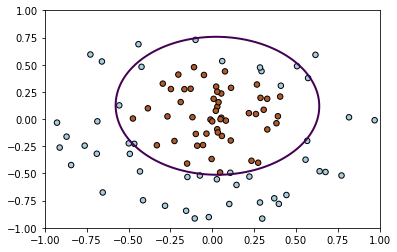

In [109]:
xx,yy = np.meshgrid(np.linspace(-1,1,500),np.linspace(-1,1,500))
xy = np.vstack([xx.ravel(),yy.ravel()]).T
Z=clf.decision_function(xy).reshape(xx.shape)

# 绘制分类曲线
plt.contour(xx,yy,Z,levels=[0],linewidths=2)
# 画出数据集中各个类别的样本点
plt.scatter(X[:,0],X[:,1],s=30,c=Y,cmap=plt.cm.Paired, edgecolors='k')
plt.show()

#### 进行预测

In [107]:
clf.predict([[1, 1]])

array([-1.])

In [108]:
clf.predict([[0, 0]])

array([1.])